# データセットの用意

In [1]:
import pickle
with open('dataset.pkl', 'rb') as f: y, X = pickle.load(f)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
plt.figure(figsize=[15, 5])
grid_spec = GridSpec(1, 4)
plt.subplot(grid_spec[:, 0])
sns.heatmap(y[:, None], cbar=None);
plt.subplot(grid_spec[:, 1:])
sns.heatmap(X);

In [3]:
plt.figure(figsize=[5, 5])
plt.scatter(X[:, 1], X[:, 2]);

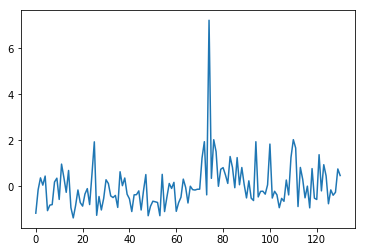

In [4]:
plt.plot(X[:, 2])

In [5]:
from scipy import argmax

In [6]:
argmax(X[:, 2])

74

In [7]:
X[74, :]

array([1.74014732, 0.47936975, 7.22786916])

<IPython.core.display.Javascript object>


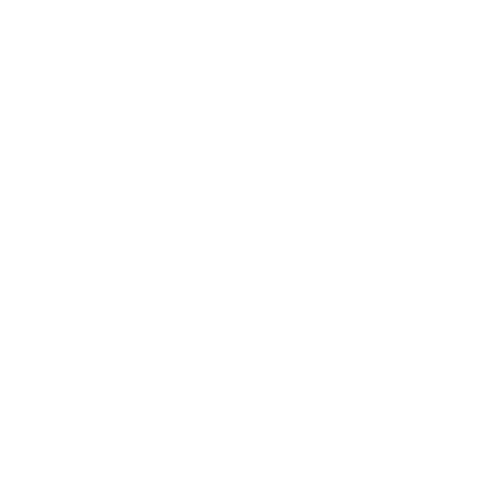

In [8]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2]);

# 外れ値の検出 

## LocalOutlierFactor() を試す

In [9]:
from sklearn.neighbors import LocalOutlierFactor
local_outlier_factor = LocalOutlierFactor(contamination='auto', novelty=True)
local_outlier_factor.fit(X)
predicted = local_outlier_factor.predict(X)

In [10]:
predicted

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

<IPython.core.display.Javascript object>


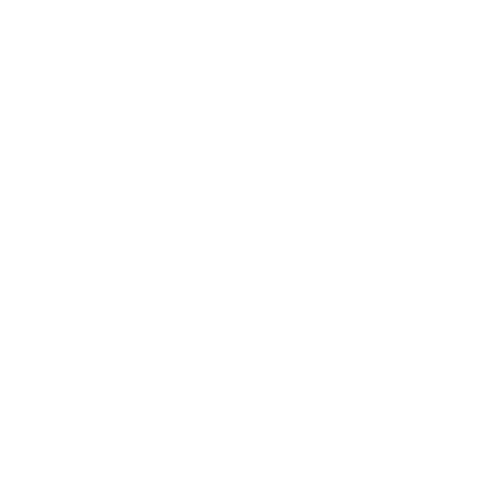

In [11]:
idx_outlier = predicted == -1
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[idx_outlier, 0], X[idx_outlier, 1], X[idx_outlier, 2]);
ax.scatter(X[~idx_outlier, 0], X[~idx_outlier, 1], X[~idx_outlier, 2]);

## パラメータを調整して閾値を上げる

In [12]:
local_outlier_factor.set_params(**{'contamination': .01});

In [13]:
local_outlier_factor.fit(X)
predicted = local_outlier_factor.predict(X);

<IPython.core.display.Javascript object>


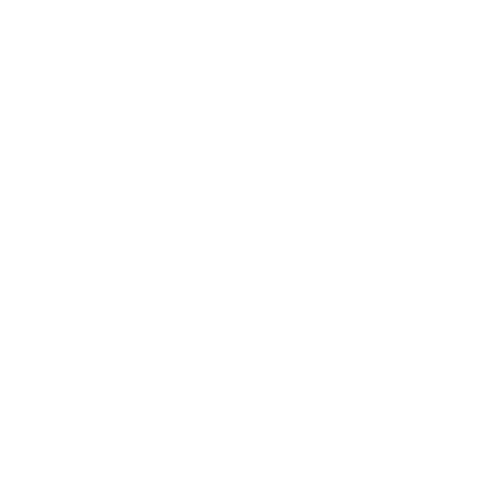

In [14]:
idx_outlier = predicted == -1
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[idx_outlier, 0], X[idx_outlier, 1], X[idx_outlier, 2]);
ax.scatter(X[~idx_outlier, 0], X[~idx_outlier, 1], X[~idx_outlier, 2]);

## 新規データに適用する

In [15]:
X_test  = X[:43,  :]
X_train = X[ 43:, :]
local_outlier_factor.fit(X_train)
idx_outlier_train = local_outlier_factor.predict(X_train) == -1
idx_outlier_test  = local_outlier_factor.predict(X_test ) == -1

<IPython.core.display.Javascript object>


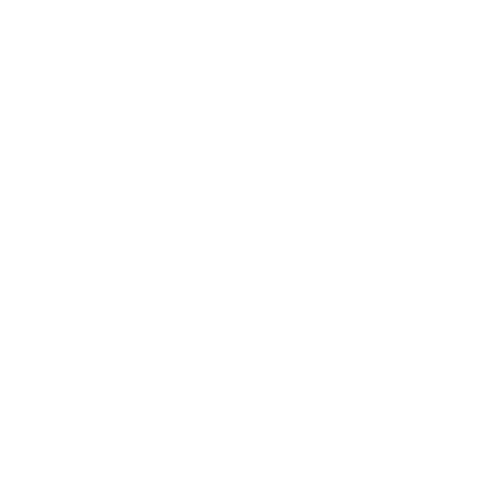

In [16]:
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[ idx_outlier_train, 0], X_train[ idx_outlier_train, 1], X_train[ idx_outlier_train, 2], color='blue');
ax.scatter(X_train[~idx_outlier_train, 0], X_train[~idx_outlier_train, 1], X_train[~idx_outlier_train, 2], color='red');
ax.scatter(X_test [ idx_outlier_test , 0], X_test [ idx_outlier_test , 1], X_test [ idx_outlier_test , 2], color='cyan');
ax.scatter(X_test [~idx_outlier_test , 0], X_test [~idx_outlier_test , 1], X_test [~idx_outlier_test , 2], color='magenta');

In [17]:
X_test  = X[ 86:, :]
X_train = X[:86 , :]
local_outlier_factor.fit(X_train)
idx_outlier_train = local_outlier_factor.predict(X_train) == -1
idx_outlier_test  = local_outlier_factor.predict(X_test ) == -1
local_outlier_factor.fit(X_train)
idx_outlier_train = local_outlier_factor.predict(X_train) == -1
idx_outlier_test  = local_outlier_factor.predict(X_test ) == -1

<IPython.core.display.Javascript object>


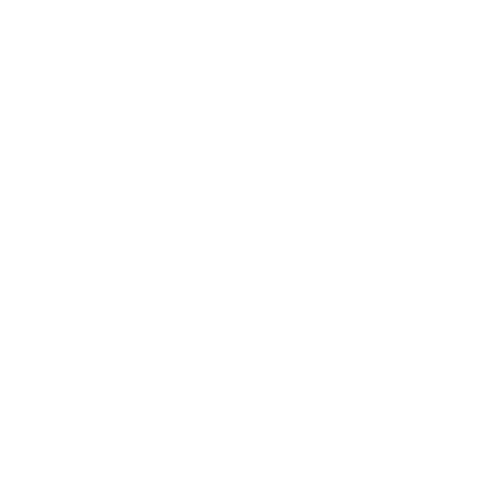

In [18]:
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[ idx_outlier_train, 0], X_train[ idx_outlier_train, 1], X_train[ idx_outlier_train, 2], color='blue');
ax.scatter(X_train[~idx_outlier_train, 0], X_train[~idx_outlier_train, 1], X_train[~idx_outlier_train, 2], color='red');
#ax.scatter(X_test [ idx_outlier_test , 0], X_test [ idx_outlier_test , 1], X_test [ idx_outlier_test , 2], color='cyan');
#ax.scatter(X_test [~idx_outlier_test , 0], X_test [~idx_outlier_test , 1], X_test [~idx_outlier_test , 2], color='magenta');


In [19]:
import numpy as np
idx_test = np.zeros(X.shape[0]).astype(bool)
idx_test[list(range(43, 86))+[10]] = True

X_test  = X[ idx_test, :]
X_train = X[~idx_test, :]
y_test  = y[ idx_test]
y_train = y[~idx_test]

local_outlier_factor.fit(X_train)
idx_outlier_train = local_outlier_factor.predict(X_train) == -1
idx_outlier_test  = local_outlier_factor.predict(X_test ) == -1
local_outlier_factor.fit(X_train)
idx_outlier_train = local_outlier_factor.predict(X_train) == -1
idx_outlier_test  = local_outlier_factor.predict(X_test ) == -1

<IPython.core.display.Javascript object>


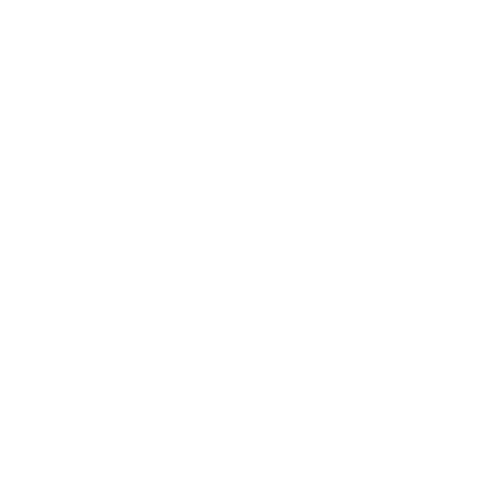

In [20]:
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[ idx_outlier_train, 0], X_train[ idx_outlier_train, 1], X_train[ idx_outlier_train, 2], color='blue');
ax.scatter(X_train[~idx_outlier_train, 0], X_train[~idx_outlier_train, 1], X_train[~idx_outlier_train, 2], color='red');
ax.scatter(X_test [ idx_outlier_test , 0], X_test [ idx_outlier_test , 1], X_test [ idx_outlier_test , 2], color='cyan');
ax.scatter(X_test [~idx_outlier_test , 0], X_test [~idx_outlier_test , 1], X_test [~idx_outlier_test , 2], color='magenta');

# Pipelineに組み込む

## sklearn準拠モデルを作る

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from copy import deepcopy
class CleanOutlier(BaseEstimator, TransformerMixin):
    def __init__(self, contamination=0):
        self.contamination = contamination
    
    def fit(self, X, y=None):
        if self.contamination==0: return self
        self.lof = LocalOutlierFactor(contamination=self.contamination, novelty=True)
        self.lof.fit(X)
        return self
    
    def transform(self, X_):
        X = deepcopy(X_)
        if self.contamination==0: return X
        idx_outlier = self.lof.predict(X)==-1
        X[idx_outlier, :] = np.nan
        
        simple_imputer = SimpleImputer()
        X = simple_imputer.fit_transform(X)

        return X

In [22]:
clean_outlier = CleanOutlier(contamination=0.05)
clean_outlier.fit(X);
X_ = clean_outlier.transform(X)

In [23]:
%matplotlib inline
fig = plt.figure(figsize=[5, 5])
plt.scatter(X[:, 1], X[:, 2])
plt.scatter(X_[:, 1], X_[:, 2]);

## Pipelineの一部として使う

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
pipeline = make_pipeline(CleanOutlier(), Lasso(random_state=0))
params = {'cleanoutlier__contamination': [0, 0.01, 0.05, 0.1],
          'lasso__alpha'               : [0.5, 1.0, 1.5]}
grid_search = GridSearchCV(pipeline, params, iid=False, cv=5, return_train_score=True)

In [25]:
grid_search.fit(X_train, y_train);

In [26]:
import pandas as pd
pd.DataFrame(grid_search.cv_results_)[['param_cleanoutlier__contamination', 'mean_test_score']]

param_cleanoutlier__contamination  mean_test_score
0                                  0         0.051436
1                                  0         0.050073
2                                  0         0.045441
3                               0.01         0.017389
4                               0.01         0.015852
5                               0.01         0.011369
6                               0.05        -0.008897
7                               0.05        -0.010068
8                               0.05        -0.013892
9                                0.1        -0.045489
10                               0.1        -0.043247
11                               0.1        -0.043395